## Sustitución por muestras aleatorias

Los métodos de imputación consisten en estimar los valores faltantes en base a los valores válidos de otras variables y/o casos de la muestra. El objectivo de cualquier método de imputación es producir un **conjunto completo** que pueda ser utlizado por un algoritmo de aprendizaje de máquina (machine learning). 

La sustitución por muestras aleatorias en principio es similar a la sustitucion por la media/mediana/moda, en el sentido que busca preservar los parámetros estadísticos de la variable original con datos ausentes.

Como su nombre lo indica, muestreo aleatorio consiste en tomar observaciones de una variable de forma aleatoria , y usarlas para sustuir los valores nulos en la misma variable. En la sustitución por muestras aleatorias, se toman tantas muestras(valores) aleatorias como valores nulos en la variable.

Con el muestreo aleatorio de la observaciones donde los datos están disponibles, garantizamos que la media y la desviación estandard de la variable se preservan.

Con el muestreo aleatorio de las observaciones en las etiquetas presentes para las variables categóricas, garantizamos que la frecuencia de las diferentes categorías / etiquetas dentro de la variable se preservan.

### Cuáles variables se pueden sustituir por muestras aleatorias?

Se puede aplicar en variables numéricas y categóricas.

### Supuestos

La sustitución por muestras aleatorias asume que los datos faltan de forma completamente aleatorios (MCAR). Si este es el caso, tiene sentido que reemplacemos los datos ausentes por valores extraidos de la distribución original de la variable

Desde el punto de vista probabilístico, los valores que son más frecuentes, como la media o la mediana o la categoría más frecuente ( para variables categóricas) serán seleccionados más frecuentemente - porque son más para seleccionar uno - pero otros valores menos frecuentes pueden tambien ser seleccionados. POr lo tanto las distribuciones de las variables se preservan.

La idea es reemplazar una población con datos nulos por una población de valores con la misma distribución de la variable original.

- Los datos faltan de forma completamente aleatorios (MCAR)
- Lo más probable es que las observaciones ausentes tengan valores como el de la mayoría de las observaciones en la variable (osea la moda o categoría mas frecuente)

La lógica es que los más probable es que el valor que deberia haber tenido el valor ausente es de hecho el valor o categoría mas frecuente de la variable.

### Ventajas

- Fácil de implementar
- Forma rápida de obtener conjuntos completos de datos
- Preserva la varianza de la variable 

### Limitaciones

- Aletoriedad
- Distorción de la relación entre la variables sustituida y el reso de las variables si e numero de datos ausentes es alto
- Consume bastante memoria para modelos en producción, ya que necesita guardar los datos originales usados para entrenar el modelo y asi poder extraer los valores que se van a usar para reemplazar los valores nulos.


### Cuándo puedo usar la sustitución por muestra aleatoria?

- Cuando los datos estan ausentes Data is missing completely at random
- No más del 5% de la variable esta ausente /Solo el 5% de la variable tiene datos faltantes
- Es apropiado cuando se quiere usar modelos lineales ya que no distorciona la distribucíon de la variable, independiente del número de valores nulos

Si se usa em combinación con un Indicador de Ausencia, como veremos en la proxima lección, ese método también puede usarse con datos que no estén ausentes de forma aleatoria o cuando el % de observaciones ausentes es alto


#### Aleatoriedad

Aletoriedad puede no ser de gran preocupación cuando se reemplazan los valores ausentes para las competiciones de ciencia de datos, donde todo el conjunto de datos ausentes es reemplazadado una vez y los datos se usan para hacer las predicciones y el problema finaliza. Sin embargo, en los casos reales de negocio, la situación es  diferente.

Imagina, por ejemplo una fábrica de autos intentando predecir cuanto tiempo un carro estará en la fabrica antes de pasar todas las pruebas de seguridad. Hoy, ellos reciben un carro con datos ausentes en alguna de las variables, corren un modelo de machine learning para predecir cuanto tiempo el carro tardará antes de pasar todas las pruebas de seguridad y reemplazan todos los valores ausentes con una muestra aleatoria y producen un estimado de cuanto tiempo va a tardar. Mañana, cuando usan el mismo modelo para el mismo carro, el modelo va a tomar otra muestra aleatoria para sustituir los valore ausentes, que puede que sean o no lo mismos que se seleccionaron hoy, y por lo tanto, la estimación final del tiempo que tardará en pasar las pruebas de seguridad puede que no sea igual al obtenido el dia anterior.

Adicionamlente, imagina que la fábrica de autos evaluá dos autos diferentes que tienen los mismos valores para todas las variables y valores ausentes para el mismo subconjunto de variables. Corren el modelo de machine learning para cada carro y ya que los datos ausentes son sustituidos con valores tomados aleatoriamente, los dos autos, que son exactamente iguales, pueden terminar con diferentes estimados de tiempos de espera para pasar las pruebas.

Esto puede no parecer importante o de hecho trivial, sin embargo negocios deben seguir una cantidad de regulaciones y algunos pueden ser requeridos dar el mismo tratamiento para situaciones similares. Si por ejemplo, en lugar de autos, estas son personas aplicando para un préstamo, or personas buscando un tratamiento médico, el modelo de machine learning puede terminar estimando diferentes soluciones para candidatos que estan bajo las mismas condiciones. Y esto ni es justo ni aceptable. Este comportamiento, por lo tanto, necesita ser evitado.

#### Entonces, debemos reemplazar los valores ausentes con muestras aleatorias o no?

Es posible reemplazar los datos ausentes con una muestra aleatoria, pero es necesario controlar la aletoriedad, asi individuos en la misma situación terminan con las mismas predicciones y por lo tanto la misma solución es ofrecida. Y cómo podemos estar seguros de que este es el caso? es necesario fijar las semillas durante los procesos de extracción de valores.

Finalmente, otra posible limitación de la muestra aleatoria, al igual que cuando se hacen sustituciones por la media o mediana,  es que la covarianza y correlaciones con las otras variables pueden ser modificados con la aletoriedad, particularmente, si hay un alto porcentaje de valores nulos.


### Nota Final

El reemplzado de valores ausentes por una muestra aleatoria, aunque es similar en concepto al reemplzado por la media o la mediana. no es tan popular en las comptetncias de ciencia de datos como estos métodos. Probablemente, por el elemento de aletoriedad o porque el código para implementarlo no es tan sencillo.

Sin embargo, es un método válido, con claras ventajas sobre la sustitucion de la media/ mediana ya que preserva la distribución de las variables. Y si eres cuidadoso con el elemento de aletoriedad y lo tienes en cuenta de alguna forma, este puede ser un buen método para elegir, particularmente para modelos lineales.

## En este demo:

Usaremos ambos conjuntos de datos: House Price y Titanic y pandas para hacer la sustitución por muestra aleatoria.

- Para bajar los datos, por favor referirse a la clase en **Datasets** en la  **Sección 1** del curso.



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# separar los datasets
from sklearn.model_selection import train_test_split

## Muestra aleatoria para variables numéricas


In [2]:
# carguemos los datos con unas columnas seleccionadas
data = pd.read_csv('../titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

survived      age      fare
0         1  29.0000  211.3375
1         1   0.9167  151.5500
2         0   2.0000  151.5500
3         0  30.0000  151.5500
4         0  25.0000  151.5500

In [3]:
# evaluemos el porcentaje de valores nulos
data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

### Importante

La estimación de la muestra debe ser completada en el segmento de entrenamiento y luego propagada al segmento de prueba. Esto significa que la misma muestra es utilizada para sustituir los valores nulos en ambos segmentos, pero se debe extraer solamente en el segmento de entrenamiento.

In [4]:
# separar datos en segmentos entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.survived, # target
    test_size=0.3, # percentage of observations in the test set
    random_state=0) # seed for reproducibility

X_train.shape, X_test.shape

((916, 3), (393, 3))

In [6]:
# sustituyamos age usando una muestra aleatoria 
# para ambos segmentos el de entrenamiento.y prueba

# creemos las nuevas variables donde los valores nulos van a ser sustituidos
# haz una copia de la variable original, con valores nulos
X_train['Age_imputed'] = X_train['age'].copy()
X_test['Age_imputed'] = X_test['age'].copy()

# extraer la muestra aleatoria para sustuir los valores nulos
# recuerda que se hace en el segmento de entrenamiento
# y luego usamos estos valores para sustituir en ambos
# segementos de entrenamiento y prueba

random_sample_train = X_train['age'].dropna().sample(
    X_train['age'].isnull().sum(), random_state=0)

random_sample_test = X_train['age'].dropna().sample(
    X_test['age'].isnull().sum(), random_state=0)

# Veamos en más detalle lo que esta sucediendo:

# 1) dropna() remueve los valores nulos NA de la variable original,
# esto significa que vamos a extraer aleatoriamente valores y no NAs

# 2) sample() es el método para calcular la muestra aleatoria

# 3) X_train['age'].isnull().sum() es el número de valores aleatorios a extraer
# queremos extraer tantos valores como valores nulos hayan en la variable original

# 4) random_state fija la semilla para poder reproducir los resultados,
# de manera que se puedan extraer siempre los mismos valores, cada vez que corramos el notebook

# pandas necesita tner el mismo índice para poder unir los datos
random_sample_train.index = X_train[X_train['age'].isnull()].index
random_sample_test.index = X_test[X_test['age'].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train['age'].isnull(), 'Age_imputed'] = random_sample_train
X_test.loc[X_test['age'].isnull(), 'Age_imputed'] = random_sample_test

/Users/natisangarita/python/courses/feml/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/natisangarita/python/courses/feml/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/natisangarita/python/courses/feml/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [7]:
# revisemos que los valores nulos fueron sustituidos
X_train['Age_imputed'].isnull().sum()

0

In [8]:
# revisemos que los valores nulos fueron sustituidos
X_test['Age_imputed'].isnull().sum()

0

In [9]:
X_train.head(15)

survived   age      fare  Age_imputed
501          1  13.0   19.5000         13.0
588          1   4.0   23.0000          4.0
402          1  30.0   13.8583         30.0
1193         0   NaN    7.7250         40.5
686          1  22.0    7.7250         22.0
971          0   NaN    7.8792         39.0
117          1  30.0   56.9292         30.0
540          1   2.0   26.0000          2.0
294          0  49.0  110.8833         49.0
261          1  35.0   26.2875         35.0
587          1   2.0   23.0000          2.0
489          1  42.0   26.0000         42.0
2            0   2.0  151.5500          2.0
405          0  18.0   13.0000         18.0
1284         0   NaN    8.0500         24.0

Podmeos ver como los valores nulos fueron reemplzados por diferentes valores en las diferentes filas u observaciones!. Esto es lo que queriamos


#### La muestra aleatoria preserva la distribución original de las variables


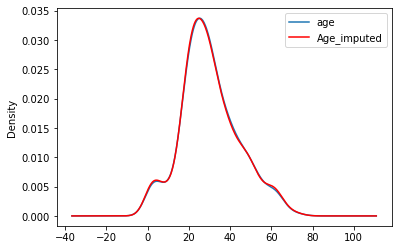

In [10]:
# podemos ver que la distribución de la variable luego de 
# la sustitución es casi igual que la original

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['age'].plot(kind='kde', ax=ax)
X_train['Age_imputed'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

We can see that replacing missing values with a random sample from the training set preserves the original distribution of the variable. If you remember from previous notebooks, every other imputation technique altered the distribution of Age, because the percentage of NA in Age is high, ~20%. However, random sample imputation preserves the distribution, even in those cases. So this imputation technique is quite handy, if we are building linear models and we don't want to distort normal distributions.

In [10]:
# there is some change in the variance of the variable.
# however this change is much smaller compared to mean / median
# imputation (check the previous notebook for comparison)

print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  210.45286924636747
Variance after random imputation:  201.59945157649167


In [11]:
# the covariance of Age with Fare is also less affected by this
# imputation technique compared to mean / median imputation

X_train[['Fare', 'Age', 'Age_imputed']].cov()

Fare         Age  Age_imputed
Fare         2328.801583   78.468894    83.260641
Age            78.468894  210.452869   210.452869
Age_imputed    83.260641  210.452869   201.599452

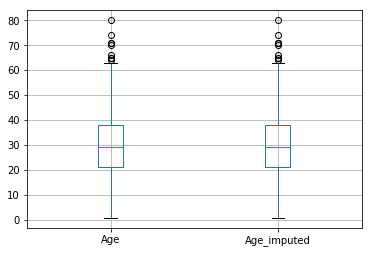

In [12]:
# Finally, the outliers are also less affected by this imputation
# technique

# Let's find out using a boxplot
X_train[['Age', 'Age_imputed']].boxplot()

So random sample imputation offers all the advantages provided by the preservation of the original distribution. And that is a big plus, particularly, if we care about distribution and outliers for our machine learning models. This is particularly relevant for linear models. But not so important for tree based algorithms.

## Randomness can lead to different scores being assigned to the same observation

Let's examine the effect of randomness on multiple scoring, and how we can mitigate this behaviour, as this is very important when putting our models in production / integrating our models with live systems.

In [13]:
# let's pick one observation with NA in Age
# in this case we pick observation indexed 5

observation = data[data.Age.isnull()].head(1)
observation

Survived  Age    Fare
5         0  NaN  8.4583

In [14]:
# and now let's fill that NA with a random value
# extracted from the same variable where observations are available

# extract a random value, just 1
sampled_value = X_train['Age'].dropna().sample(1)

# re index to 5
sampled_value.index = [5]  # pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation['Age_random'] = sampled_value

observation

Survived  Age    Fare  Age_random
5         0  NaN  8.4583        19.0

In [15]:
# let's repeat the exercise again: 
# we fill the NA with another random extracted value

# extract a random value, just 1
sampled_value = X_train['Age'].dropna().sample(1)

# re index to 5
sampled_value.index = [5]  #pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation['Age_random'] = sampled_value

observation

Survived  Age    Fare  Age_random
5         0  NaN  8.4583        19.0

In [16]:
# and again
# we fill the NA with another random extracted value

# extract a random value, just 1
sampled_value = X_train['Age'].dropna().sample(1)

# re index to 5
sampled_value.index = [5]  #pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation['Age_random'] = sampled_value

observation

Survived  Age    Fare  Age_random
5         0  NaN  8.4583        44.0

We can see that every time we repeat the operation, we get a different value replacement for exactly the same observation. In fact, if we repeat the process 1000 times:

Text(0, 0.5, 'Number of times')

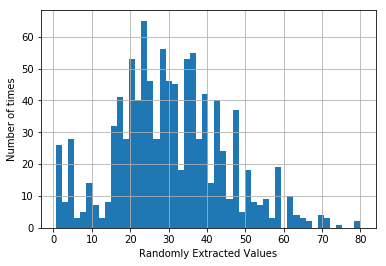

In [17]:
# if we repeat the process 1000 times:

values_ls = []

# capture the non-Na values to speed
# the computation
tmp = X_train.Age.dropna()

for i in range(1000):
    
    # extract a random value, just 1
    sampled_value = tmp.sample(1).values
    
    # add the extracted value to the list
    values_ls.append(float(sampled_value))
    
pd.Series(values_ls).hist(bins=50)
plt.xlabel('Randomly Extracted Values')
plt.ylabel('Number of times')

We obtain very different values for the same observation. Note how the distribution of extracted values is similar to the distribution of Age.

If this were patients looking for treatment, every time we run a predictive model, which would operate on the differently randomly extracted values, we would assign patients with the same characteristics to different treatments, and this is not OK.

### How can we fix this behaviour?

We can fix this randomness by assigning a seed:

In [18]:
values_ls = []

for i in range(100):

    # extract a random value, just 1, now with seed
    sampled_value = X_train.Age.dropna().sample(1, random_state=10)

    # add random value to the list
    values_ls.append(float(sampled_value))

# print the values
pd.Series(values_ls).unique()

array([2.])

In [11]:
values_ls

NameError: name 'values_ls' is not defined

Ahora que la semila esta fija, los valores aloeatorios extraidos para cada observación son los mismos

Sin embargo, si fijamos la misma semilla para cada observación, lo que pasaria es que por cada diferente observación, podriamos estar sustituyendo los valores nulos con el mismo valor ( misma semilla == mismo valor aleatorio extraido) Esto seria lo equivalente a la sustitición por valor arbitrario!!!!

No queremos ese comportamiento tampoco

Por lo tanto, queremos que nuestra semilla cambie de observacion en observación, pero de una forma controalda, asi dos observaciones que sean toalmente iguales, recibirán el mismo valor aleatorio para imputar. Pero dos observaciones que son diferentes, recibiran diferentes valores aleatrios para reemplazar.



### Controlando el elemento de aleatoriedad variando la semilla

We can attribute a different seed to each observation, and in fact, we can make this seed depend on an alternative variable of the same observation, thus, thinking in the Titanic dataset, if 2 passengers paid exactly the same Fare, they would get exactly the same probability of survival (when Age is missing).

In [20]:
# let's pick one observation with NA in Age
# in this case we pick observation indexed 5

observation = data[data.Age.isnull()].head(1)
observation

Survived  Age    Fare
5         0  NaN  8.4583

In [21]:
# the seed is now the Fare

int(observation.Fare)

8

In [22]:
# we assign the Fare as the seed in the random sample extraction
sampled_value = X_train.Age.dropna().sample(1,
                                            random_state=int(observation.Fare))
sampled_value.index = [5]

observation['Age_random'] = sampled_value
observation

Survived  Age    Fare  Age_random
5         0  NaN  8.4583        25.0

In [23]:
# for a different observation with a different Fare,
# we would get a different randomly extracted value

observation = data[data.Age.isnull()].tail(1)
observation

Survived  Age   Fare
888         0  NaN  23.45

In [24]:
# new seed
int(observation.Fare)

23

In [25]:
# we assign the Fare as the seed in the random sample extraction
sampled_value = X_train.Age.dropna().sample(1,
                                            random_state=int(observation.Fare))
sampled_value.index = [888]

observation['Age_random'] = sampled_value
observation

Survived  Age   Fare  Age_random
888         0  NaN  23.45        35.0

This is a way of controlling the randomness. Using the Fare to set the random state, you guarantee that for 2 passengers with equal Fare, the Age will be replaced with the same number, and therefore the 2 passengers will get the same probability of survival.

### Note!!

In real life, you will build models that use tens of variables or more. So in cases like those, you can think of picking the 3-5 more important variables, those that have the strongest impact on the output of the machine learning model, and combine them to create the random state. Therefore, customers that share the 3-5 main variable values, will get the same scores.

## Random Sampling for Categorical Variables

In [26]:
# let's load the dataset with a few columns for the demonstration
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)

# let's inspect the percentage of missing values in each variable
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
FireplaceQu    0.472603
dtype: float64

In [27]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data.SalePrice,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [28]:
# let's impute BsmtQual by random sampling both in
# train and test sets

# create the new variable where NA will be imputed
# make a copy from the original variable, with NA
X_train['BsmtQual_imputed'] = X_train['BsmtQual'].copy()
X_test['BsmtQual_imputed'] = X_test['BsmtQual'].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = X_train['BsmtQual'].dropna().sample(
    X_train['BsmtQual'].isnull().sum(), random_state=0)

random_sample_test = X_train['BsmtQual'].dropna().sample(
    X_test['BsmtQual'].isnull().sum(), random_state=0)

# what is all of the above code doing?
# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['BsmtQual'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract 
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train['BsmtQual'].isnull()].index
random_sample_test.index = X_test[X_test['BsmtQual'].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train['BsmtQual'].isnull(), 'BsmtQual_imputed'] = random_sample_train
X_test.loc[X_test['BsmtQual'].isnull(), 'BsmtQual_imputed'] = random_sample_test

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [29]:
# let's impute FireplaceQu by random sampling both in
# train and test sets

# create the new variable where NA will be imputed
# make a copy from the original variable, with NA
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu'].copy()
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu'].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = X_train['FireplaceQu'].dropna().sample(
    X_train['FireplaceQu'].isnull().sum(), random_state=0)

random_sample_test = X_train['FireplaceQu'].dropna().sample(
    X_test['FireplaceQu'].isnull().sum(), random_state=0)

# what is all of the above code doing?
# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['FireplaceQu'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract 
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train['FireplaceQu'].isnull()].index
random_sample_test.index = X_test[X_test['FireplaceQu'].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train['FireplaceQu'].isnull(), 'FireplaceQu_imputed'] = random_sample_train
X_test.loc[X_test['FireplaceQu'].isnull(), 'FireplaceQu_imputed'] = random_sample_test

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [30]:
# check that nulls were removed
X_train['FireplaceQu_imputed'].isnull().sum()

0

In [31]:
# and now let's evaluate the effect of the imputation on the distribution
# of the categories and the target within those categories

# we used a similar function in the notebook of arbitrary value imputation
# for categorical variables

def categorical_distribution(df, variable_original, variable_imputed):

    tmp = pd.concat(
        [
            # percentage of observations per category, original variable
            df[variable_original].value_counts() / len(df[variable_original].dropna()),

            # percentage of observations per category, imputed variable
            df[variable_imputed].value_counts() / len(df)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'imputed']

    return tmp

In [32]:
# run the function in a categorical variable
categorical_distribution(X_train, 'BsmtQual', 'BsmtQual_imputed')

original   imputed
TA  0.463928  0.465753
Gd  0.430862  0.428571
Ex  0.082164  0.083170
Fa  0.023046  0.022505

In [33]:
# run the function in a categorical variable
categorical_distribution(X_train, 'FireplaceQu', 'FireplaceQu_imputed')

original   imputed
Gd  0.468750  0.469667
TA  0.420956  0.420744
Fa  0.047794  0.046967
Ex  0.033088  0.032290
Po  0.029412  0.030333

As expected, the percentage of observations within each category is very similar in the original and imputed variables, for both BsmtQual where NA are low and FireplaceQu were NA are high.

In [34]:
# now let's look at the distribution of the target within each
# variable category

def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].dropna().unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].dropna().unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()

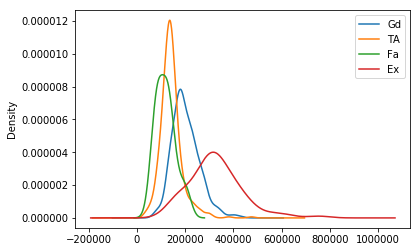

In [35]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')

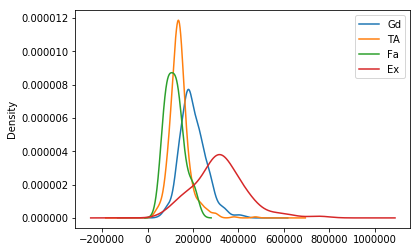

In [36]:
automate_plot(X_train, 'BsmtQual_imputed', 'SalePrice')

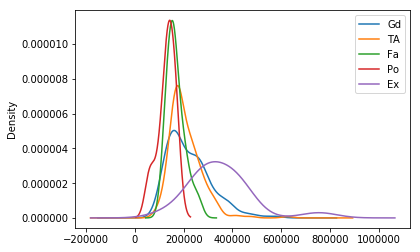

In [37]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

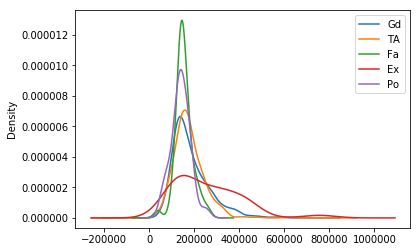

In [38]:
automate_plot(X_train, 'FireplaceQu_imputed', 'SalePrice')

For BsmtQual, where the NA are low, the distribution of the target is preserved for the categories in the original and imputed variable. However, for FireplaceQu, which contains more NAs, the distribution of the target per category is affected slightly.

## Note on Random Sample Imputation code

The code provided in this notebook for random sampling, is a bit complex. Don't worry! You can do random sample imputation using the package feature engine in just a couple of lines. I will show you how in a coming notebok
